## 1. Linear Regression

### 1. Linear Regression (1 Feature)

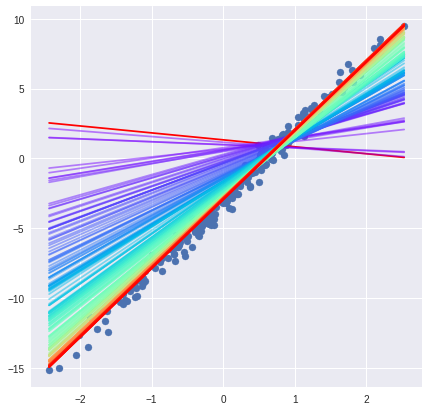

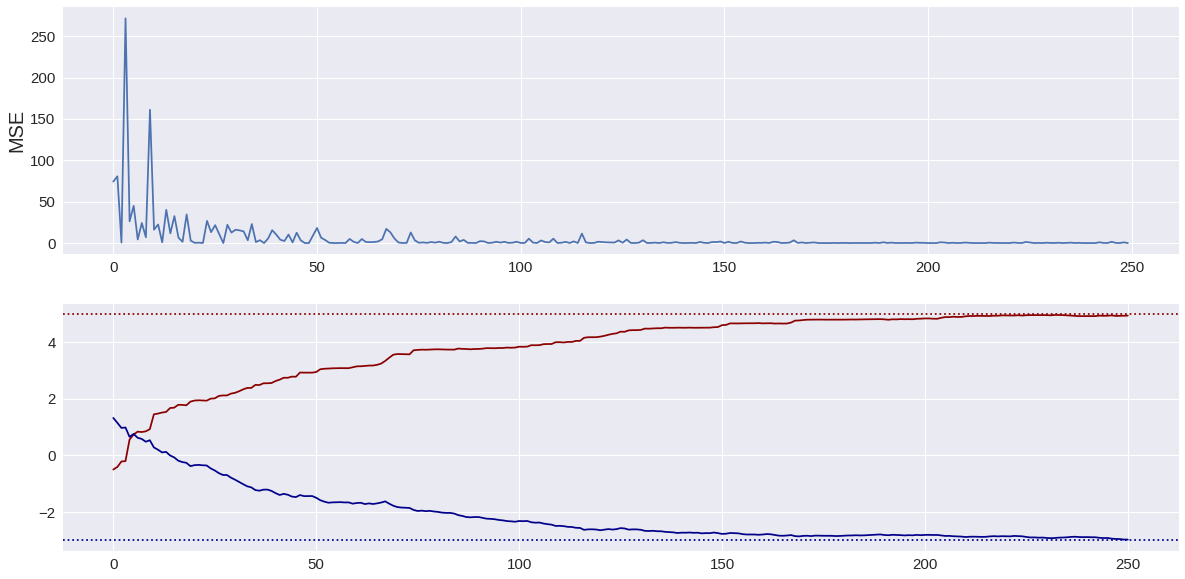

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Set random seed, plt style
np.random.seed(1)
plt.style.use("seaborn")

#Set params
N = 250
lr = 0.01
target_w, target_b = 5, -3
w, b = np.random.uniform(-3, 3, 2)

#Generate dataset
x_data = np.random.randn(N, )
y_data = x_data * target_w + target_b
y_data += 0.5 * np.random.randn(N, )

#Visualization
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(x_data, y_data)

#Visualize initial model
x_range = np.array([x_data.min(), x_data.max()])
y_range = x_range * w + b
cmap = cm.get_cmap("rainbow", lut = N) #set cmap
ax.plot(x_range, y_range, color = cmap(999), alpha = 1.0)

#Train model and visualize updated models
J_track = list()
w_track, b_track = [w], [b]
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):

    #Forward propagation
    pred = x * w + b
    J = (y - pred)**2
    J_track.append(J)

    #Jacobians
    dJ_dpred = -2 * (y - pred)
    dpred_dw, dpred_db = x, 1

    #Backpropagation
    dJ_dw = dJ_dpred * dpred_dw
    dJ_db = dJ_dpred * dpred_db

    #Parameter update
    w = w - lr * dJ_dw
    b = b - lr * dJ_db
    w_track.append(w)
    b_track.append(b)

    #Visualize updated model
    y_range = x_range * w + b
    ax.plot(x_range, y_range, color = cmap(data_idx), alpha = 0.5)

#Visualize results
fig, axes = plt.subplots(2, 1, figsize = (20, 10))
axes[0].plot(J_track)
axes[1].plot(w_track, color = "darkred")
axes[1].plot(b_track, color = "darkblue")

axes[0].set_ylabel("MSE", fontsize = 20)
axes[0].tick_params(labelsize = 15)

axes[1].axhline(y = target_w, color = "darkred", linestyle = ":")
axes[1].axhline(y = target_b, color = "darkblue", linestyle = ":")
axes[1].tick_params(labelsize = 15)

### 2. Linear Regression (N Features)

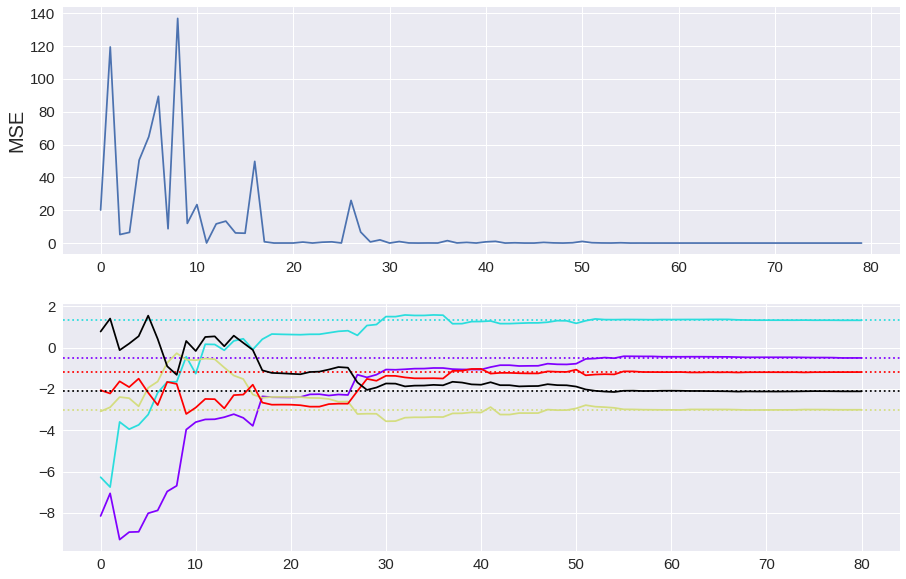

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Set random seed, plt style
np.random.seed(1)
plt.style.use("seaborn")

#Set params
N, n_feature = 80, 4
lr = 0.07
target_w_vec = np.random.uniform(-3, 3, (n_feature, 1)) #Column vector (n_feature, 1)
target_b = np.random.uniform(-3, 3, (1, ))              #(1, )
w_vec = np.random.uniform(-10, 10, (n_feature, 1))      #(n_feature, 1)
b = np.random.uniform(-10, 10, (1, 1))                  #(1, 1)

#Generate dataset
x_data = np.random.randn(N, n_feature)      #(N, n_feature)
y_data = x_data @ target_w_vec + target_b   #(N, 1)

#Train model and visualize updated models
J_track = list()
w_vec_track, b_track = [w_vec], [b]
for (x_vec, y) in zip(x_data, y_data):

    #Reshape
    x_vec = x_vec.reshape(n_feature, 1) #Convert to vector: (n_feature, ) -> (n_feature, 1)
    y = y.squeeze()                     #Convert to scalar: (1, ) -> ()
    
    #Forward propagation
    x_vec_T = x_vec.reshape(1, -1)  #Convert to row vector: (n_feature, 1) -> (1, n_feature)
    pred = x_vec_T @ w_vec + b      #(1, 1)
    J = (y - pred) ** 2             #(1, 1)
    J_track.append(J.squeeze())     #Convert to scalar: (1, 1) -> ()

    #Jacobians
    dJ_dpred = -2 * (y - pred)  #(1, 1)
    dpred_dw = x_vec_T          #(1, n_feature) 
    dpred_db = 1                #()

    #Backpropagation
    dJ_dw = dJ_dpred * dpred_dw #(1, n_feature)
    dJ_db = dJ_dpred * dpred_db #(1, 1)

    #Parameter update
    dJ_dw_T = dJ_dw.reshape(-1, 1)  #(n_feature, 1)
    w_vec = w_vec - lr * dJ_dw_T    #(n_feature, 1)
    b = b - lr * dJ_db              #(1, 1)

    w_vec_track.append(w_vec)
    b_track.append(b)

#Concatenating array (array -> <- array)
w_vec_track = np.hstack(w_vec_track)
b_track = np.hstack(b_track).flatten()

#Visualize results
fig, axes = plt.subplots(2, 1, figsize = (15, 10))
axes[0].plot(J_track)
axes[0].set_ylabel("MSE", fontsize = 20)
axes[0].tick_params(labelsize = 15)

cmap = cm.get_cmap("rainbow", lut = n_feature)
for w_vec_idx, (target_w, w) in enumerate(zip(target_w_vec, w_vec_track)):
    axes[1].axhline(y = target_w, color = cmap(w_vec_idx), linestyle = ":")
    axes[1].plot(w, color = cmap(w_vec_idx))
axes[1].axhline(y = target_b, color = "black", linestyle = ":")
axes[1].plot(b_track, color = "black")
axes[1].tick_params(labelsize = 15)

## 2. Logistic Regression

### 1. Sigmoid

#### 1. w가 sigmoid에 미치는 영향

w가 0.1부터 10까지 linear하게 변화할 때 마다 sigmoid 함수의 곡률 변화
* Logistic regression은 step function이 될 때 까지 무한히 학습하는 경우를 보여줌.

* w는 sigmoid의 곡률에 영향을 미침.

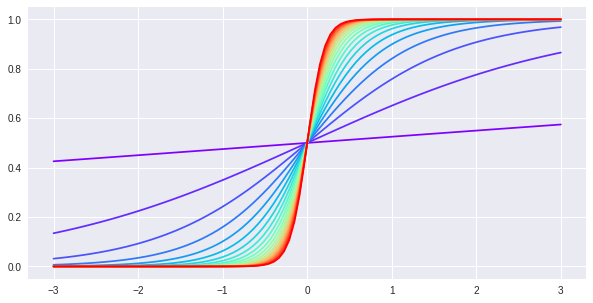

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use("seaborn")
x = np.linspace(-3, 3, 100)

n_w = 20
w_list = np.linspace(0.1, 10, n_w)
cmap = cm.get_cmap("rainbow", lut = n_w)

fig, ax = plt.subplots(figsize = (10, 5))
for w_idx, w in enumerate(w_list):
    z = x * w
    sigmoid = 1/(1 + np.exp(-z))

    ax.plot(x, sigmoid, color = cmap(w_idx))

#### 2. bias가 sigmoid에 미치는 영향

b가 0부터 5까지 변화함에 따라 (w는 1로 고정) sigmoid의 함수의 변화
* w이 양수일 때 b가 증가할수록 sigmoid는 x축의 음의 방향으로 이동함.

* b는 sigmoid의 평행 이동의 관점에서 영향을 미침

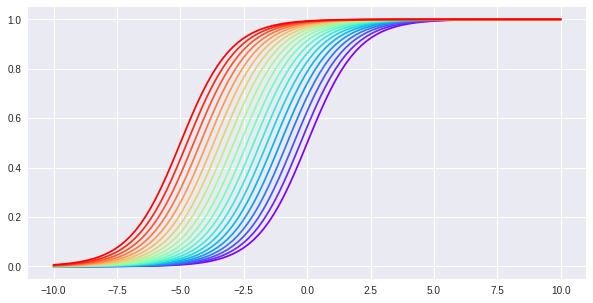

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

plt.style.use("seaborn")
x = np.linspace(-10, 10, 100)

w = 1
n_b = 20
b_list = np.linspace(0, 5, n_w)

cmap = cm.get_cmap("rainbow", lut = n_w)
fig, ax = plt.subplots(figsize = (10, 5))

for b_idx, b in enumerate(b_list):
    z = x * w + b
    sigmoid = 1/(1 + np.exp(-z))

    ax.plot(x, sigmoid, color = cmap(b_idx))

### 2. Logistic Regression (1 Feature)

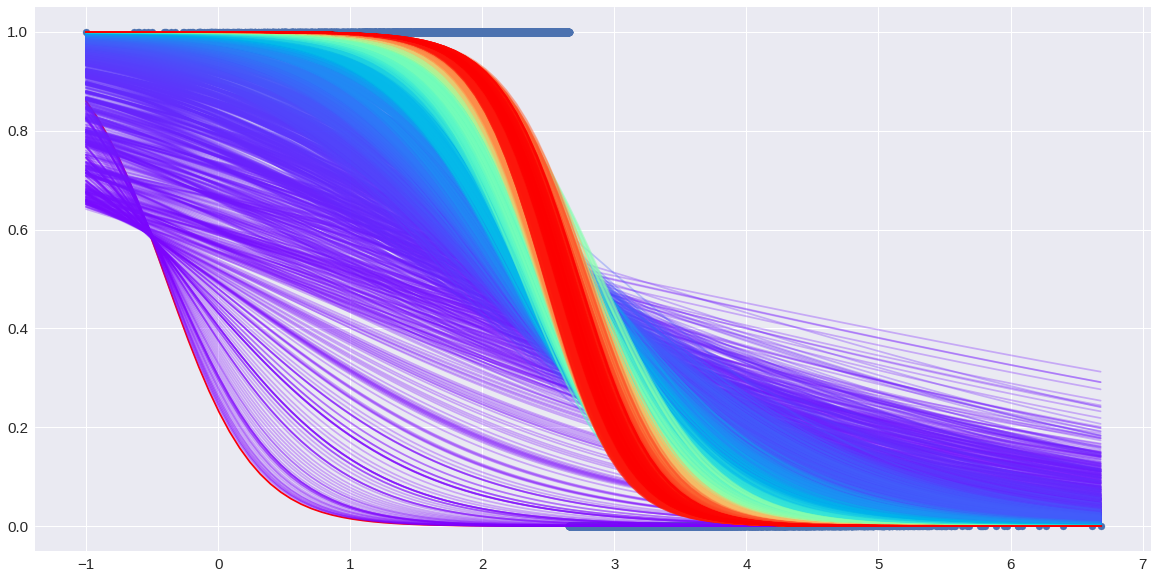

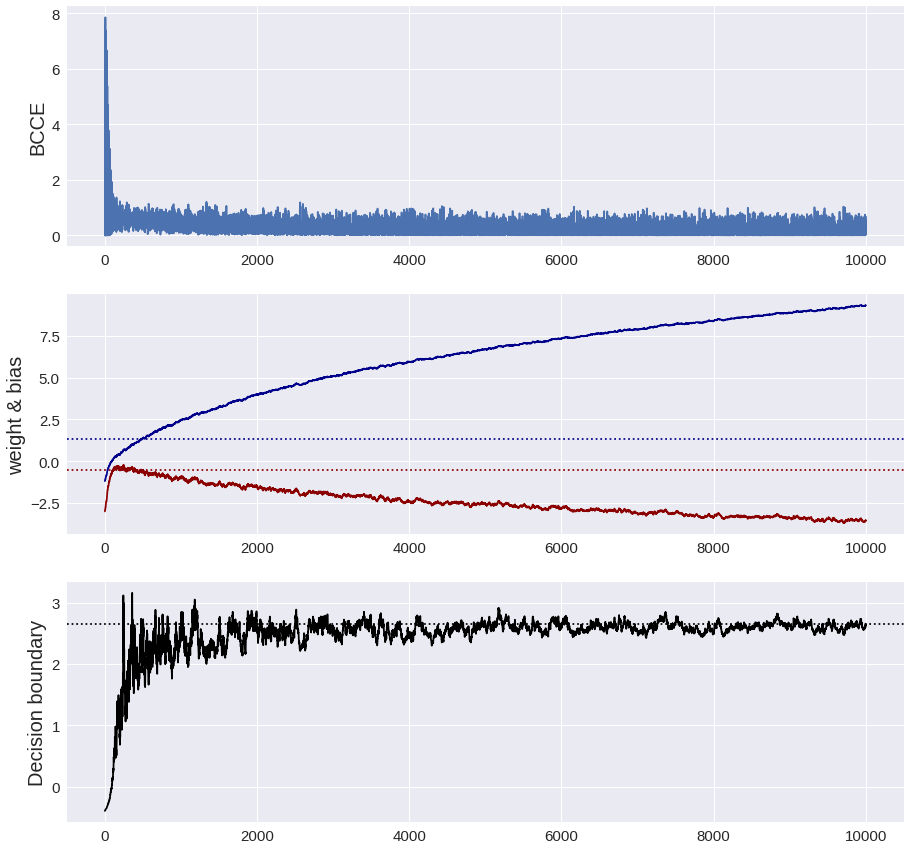

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Set random seed, plt style
np.random.seed(1)
plt.style.use("seaborn")

#Set params
N = 10000
lr = 0.03
target_w = np.random.uniform(-3, 3, (1, ))
target_b = np.random.uniform(-3, 3, (1, ))
target_db = - target_b / target_w #decision boundary
w = np.random.uniform(-3, 3, (1, ))
b = np.random.uniform(-3, 3, (1, ))

#Generate dataset
x_data = np.random.normal(target_db, 1, size = (N, ))
y_data = x_data * target_w + target_b
y_data = 1 / (1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(int)

#Visualize dataset 
fig, ax = plt.subplots(figsize = (20, 10))
ax.scatter(x_data, y_data)

#Visualize initial model
x_range = np.linspace(x_data.min(), x_data.max(), 100)
y_range = x_range * w + b
y_range = 1 / (1 + np.exp(-y_range))

cmap = cm.get_cmap("rainbow", lut = N)
ax.plot(x_range, y_range, color = cmap(9999), alpha = 1)

#Train model and visualize updated models
J_track = list()
w_track, b_track, db_track = [w], [b], [-b/w]
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):

    #Forward propagation
    z = x * w + b
    pred = 1 / (1 + np.exp(-z))
    J = -(y * np.log(pred) + (1 - y) * np.log(1-pred))
    J_track.append(J)

    #Jacobians
    dJ_dpred = (pred - y) / (pred * (1 - pred))
    dpred_dz = pred * (1 - pred)
    dz_dw = x
    dz_db = 1

    #Backpropagation
    dJ_dw = dJ_dpred * dpred_dz * dz_dw
    dJ_db = dJ_dpred * dpred_dz * dz_db

    #Parameter update
    w = w - lr * dJ_dw
    b = b - lr * dJ_db
    db = -b/w
    w_track.append(w)
    b_track.append(b)
    db_track.append(db)

    #Visualize updated model
    y_range = x_range * w + b
    y_range = 1 / (1 + np.exp(-y_range))
    ax.plot(x_range, y_range, color = cmap(data_idx), alpha = 0.3)
    ax.tick_params(labelsize = 15)

#Visualize results
fig, axes = plt.subplots(3, 1, figsize = (15, 15))

axes[0].plot(J_track)
axes[0].set_ylabel("BCCE", fontsize = 20)
axes[0].tick_params(labelsize = 15)

axes[1].axhline(y = target_w, color = "darkred", linestyle = ":")
axes[1].plot(w_track, color = "darkred")
axes[1].axhline(y = target_b, color = "darkblue", linestyle = ":")
axes[1].plot(b_track, color = "darkblue")
axes[1].set_ylabel("weight & bias", fontsize = 20)
axes[1].tick_params(labelsize = 15)

axes[2].axhline(y = target_db, color = "black", linestyle = ":")
axes[2].plot(db_track, color = "black")
axes[2].set_ylabel("Decision boundary", fontsize = 20)
axes[2].tick_params(labelsize = 15)

* Logistic regression의 최종 activation function인 sigmoid 함수는 학습이 진행될수록  점점 step function 형태가 되는 것을 볼 수 있음.
* 학습이 진행될수록 decision boundary가 target decision boundary (약 2.7)에 가까워 지는 모습을 볼 수 있음.
* $w$는 학습이 진행될수록 점점 음의 방향으로 발산하는 모습을 볼 수 있음.($w \rightarrow -∞ $)
* 적절한 decision boundary ($-\frac{b}{w}=2.5$)를 유지해야 하기 때문에 $b$는 $w$보다 급격하게 양의 방향으로 발산하는 모습을 볼 수 있음. ($b \rightarrow ∞ $)

### 3. Logistic Regression (N Features)

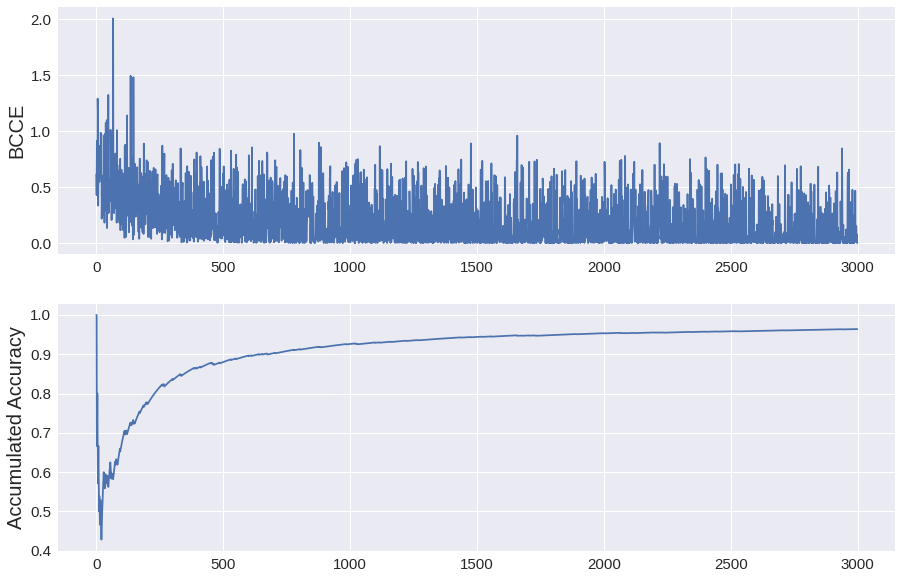

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm

#Set random seed, plt style
np.random.seed(1)
plt.style.use("seaborn")

#Set params
N, n_feature = 3000, 5
lr = 0.03
target_w_vec = np.random.uniform(-1, 1, (n_feature, 1)) #(n_feature, 1)
target_b = np.random.uniform(-1, 1, (1, ))              #(1, )
target_db_vec = - target_b / target_w                   #(n_feature, 1)
w_vec = np.random.uniform(-1, 1, (n_feature, 1))        #(n_feature, 1)
b = np.random.uniform(-1, 1, (1, 1))                    #(1, 1)

#Generate dataset
x_data = np.random.randn(N, n_feature)      #(N, n_feature)
y_data = x_data @ target_w_vec + target_b   #(N, 1)
y_data = 1 / (1 + np.exp(-y_data))
y_data = (y_data > 0.5).astype(int)

#Train model and visualize updated models
J_track, acc_track = list(), list()
n_correct = 0
for data_idx, (x, y) in enumerate(zip(x_data, y_data)):   

    #Forward propagation
    z = x.T @ w_vec + b         #(1, 1)
    pred = 1 / (1 + np.exp(-z))
    J = -(y * np.log(pred) + (1 - y) * np.log(1-pred))
    J_track.append(J.squeeze())

    #Calculate accumulated accuracy
    pred_ = (pred > 0.5).astype(int).squeeze()
    if pred_ == y:
        n_correct += 1
    acc_track.append(n_correct / (data_idx + 1))

    #Jacobians
    dJ_dpred = (pred - y) / (pred * (1 - pred)) #(1, 1)
    dpred_dz = pred * (1 - pred)                #(1, 1)
    dz_dw = x.T
    dz_db = 1

    #Backpropagation
    dJ_dw = dJ_dpred * dpred_dz * dz_dw #(1, n_feature)
    dJ_db = dJ_dpred * dpred_dz * dz_db #(1, 1)

    #Parameter update
    w_vec = w_vec - lr * dJ_dw.T    #(n_feature, 1)
    b = b - lr * dJ_db              #(1, 1)

#Visualize results
fig, axes = plt.subplots(2, 1, figsize = (15, 10))

axes[0].plot(J_track)
axes[0].set_ylabel("BCCE", fontsize = 20)
axes[0].tick_params(labelsize = 15)

axes[1].plot(acc_track)
axes[1].set_ylabel("Accumulated Accuracy", fontsize = 20)
axes[1].tick_params(labelsize = 15)

* feature가 여러 개 일 때 logistic regression의 decision boundary  
  * feature가 2 개 일 때 $̂\hat{y}$는 다음과 같다.  
\
$\quad \hat{y} = \displaystyle\frac{1}{1 + e^{(x_1w_1 + x_2w_2 + b)}}$  
\
이 때 decision boundary는 다음과 같다.  
\
$\quad x_1w_1 + x_2w_2 + b = 0$  
\
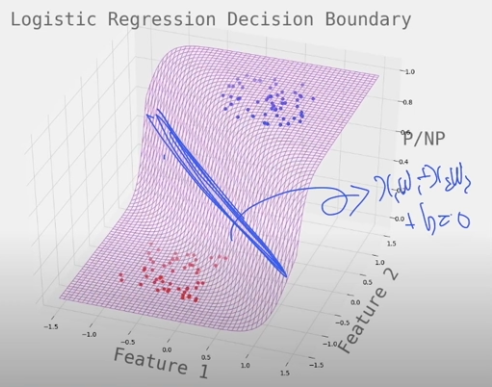

* feature가 2개 일 때는 2차원(직선)의 decision boundary를 갖는다.
-> feature의 개수가 많아질 수록 고차원의 decision boundary를 갖는다.

